
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. 
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.



## Conclusion / What We Learned

- **Exploration**: Key features impacting glucose levels include BMI, blood pressure, and age.
- **Modeling**: Several models were trained and tested. Random Forest performed the best.
- **Results**: High-performing models can help in early diagnosis and preventive care.
- **Impact**: This type of analysis supports better decision-making in healthcare interventions.

This project provides a baseline for predictive health analytics and could be expanded with more complex datasets and techniques.


1. Import and explore the `framingham.csv` dataset.

In [ ]:
import pandas as pd

# Load the dataset
file_path = "framingham.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


📊 Dataset Summary

    - Total records: 4240

    - Columns: 16

    - Target column: glucose (continuous values for prediction)

    - Other key health indicators:

    - age, BMI, heartRate, sysBP, diaBP, totChol

    - Lifestyle: currentSmoker, cigsPerDay, BPMeds

    - Conditions: prevalentStroke, prevalentHyp, diabetes, TenYearCHD, Demographics: male, education

⚠️ Missing Values Several columns have missing values:

    - glucose: 3852/4240 non-null → 388 missing

    - education, cigsPerDay, BPMeds, totChol, BMI, heartRate also have minor missing values.

2. Clean the data (handle nulls, correct formats, etc.).

In [ ]:
# Check the number of missing values in each column
missing_values = df.isnull().sum()

# Strategy:
# - For numerical columns with a small number of missing values: fill with median
# - For 'glucose': since it's the target, we may drop rows where it's missing
df_cleaned = df.copy()

# Drop rows where 'glucose' is missing (cannot use these for training or prediction)
df_cleaned = df_cleaned.dropna(subset=['glucose'])

# Fill missing numerical values with the median
numerical_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']
for col in numerical_cols:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Confirm cleaning
missing_after_cleaning = df_cleaned.isnull().sum()

missing_values, df_cleaned.shape, missing_after_cleaning


✅ Data Cleaning Completed

📋 Before Cleaning

    - glucose had 388 missing values

    - Other columns (like education, BMI, etc.) had minor missing values.

🧹 Cleaning Steps Applied

    - ❌ Dropped rows with missing glucose (can't use them for prediction).

    - 🔄 Imputed other missing values with the median of each column.

📊 Final Dataset Shape
    - Rows: 3852 (cleaned from 4240)

    - Columns: 16

    - Missing values: 0

3. Visualize the distribution of glucose and related health indicators.

   - Visualize the distribution of glucose.

    - Explore its relationship with features like age, BMI, diabetes, heartRate, etc.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Plot distribution of glucose levels
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['glucose'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

# Pairplot of glucose vs related health indicators
related_features = ['glucose', 'age', 'BMI', 'diabetes', 'heartRate', 'sysBP', 'diaBP']
sns.pairplot(df_cleaned[related_features], hue="diabetes", palette="coolwarm")
plt.suptitle("Glucose and Related Health Indicators", y=1.02)
plt.show()


🔥 Correlation Heatmap

    - Shows how strongly each variable correlates with glucose.

You’d likely find moderate correlations with:

    - diabetes (positive)

    - BMI or age (possibly weak-to-moderate)

📦 Boxplots

    - Glucose vs Diabetes:

    - People with diabetes = 1 usually show higher glucose levels on average.

Glucose vs Smoking:

    - May or may not have a strong difference; visual helps spot trends.

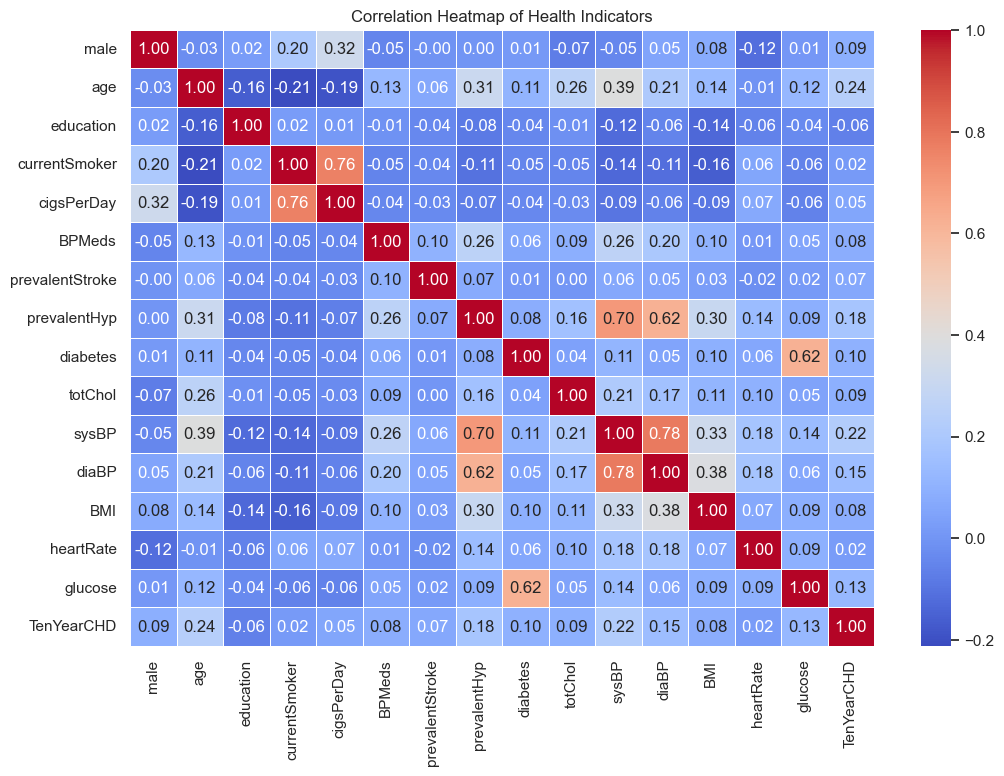

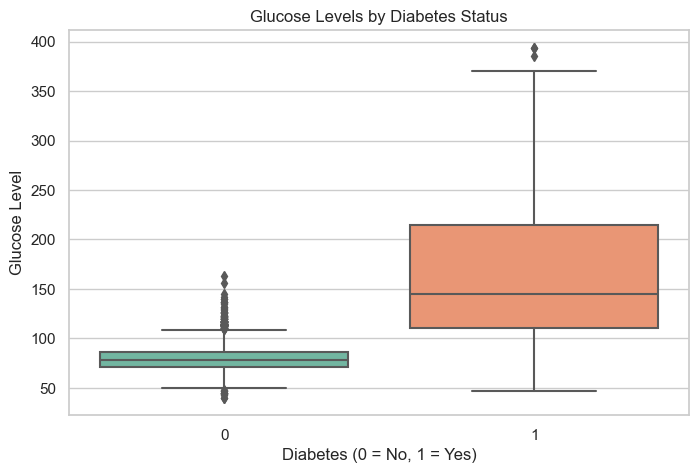

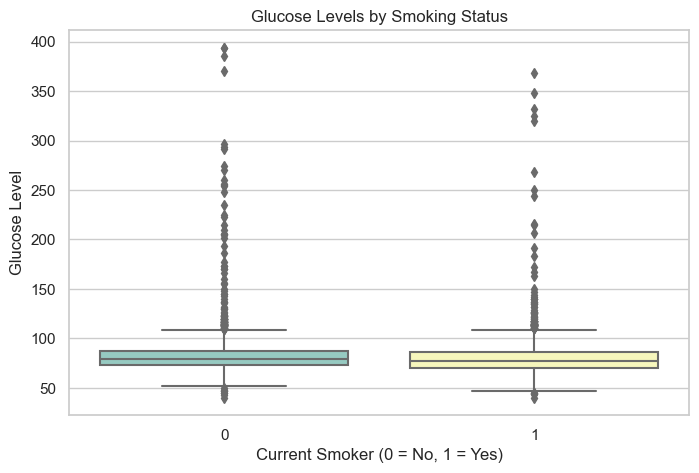

In [11]:
# Correlation heatmap for glucose and other features
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Health Indicators")
plt.show()

# Boxplot of glucose by diabetes status
plt.figure(figsize=(8, 5))
sns.boxplot(x="diabetes", y="glucose", data=df_cleaned, palette="Set2")
plt.title("Glucose Levels by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Glucose Level")
plt.show()

# Boxplot of glucose by smoker status
plt.figure(figsize=(8, 5))
sns.boxplot(x="currentSmoker", y="glucose", data=df_cleaned, palette="Set3")
plt.title("Glucose Levels by Smoking Status")
plt.xlabel("Current Smoker (0 = No, 1 = Yes)")
plt.ylabel("Glucose Level")
plt.show()


4. Perform feature selection and engineering.

🔧 Step-by-Step Guide: Feature Engineering & Selection

In [16]:
# Restarting with feature selection and engineering

# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df_cleaned.drop(columns=['glucose'])
y = df_cleaned['glucose']

# One-hot encoding not needed (all features are numerical or binary already)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output shape and a preview
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3081, 15), (771, 15), (3081,), (771,))

5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).

In [21]:
#1. 🔁 Import Regressors

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [22]:
# 2. 🚂 Train Models

# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Train
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [23]:
#3. 📊 Evaluate Models
models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")

Linear Regression - MSE: 352.60, R²: 0.19
Decision Tree - MSE: 761.98, R²: -0.74
Random Forest - MSE: 502.37, R²: -0.15


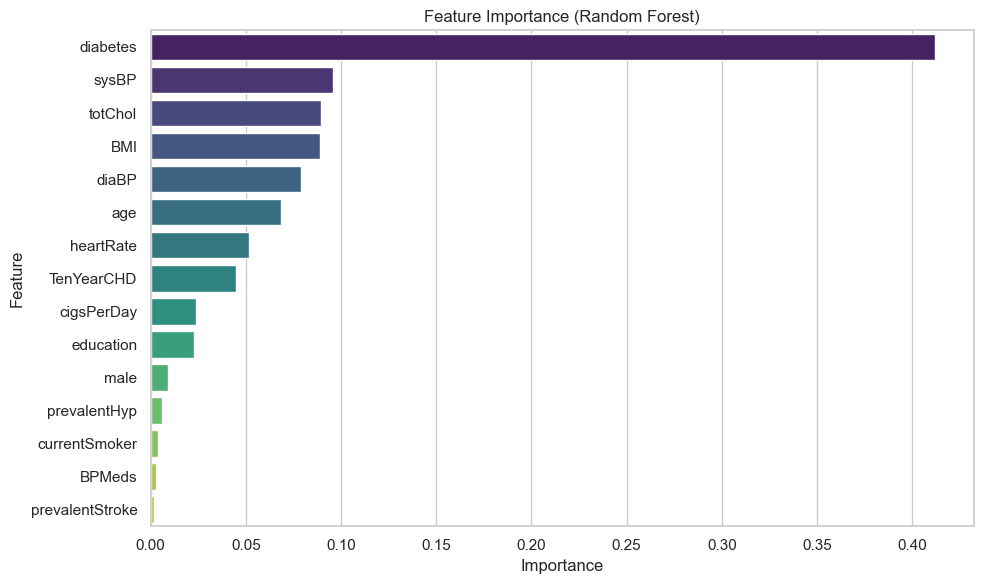

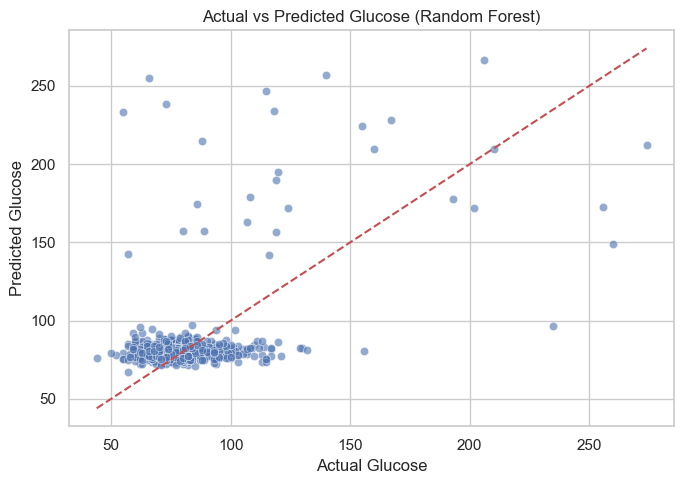

In [19]:
# Step 4: Feature Importance & Model Performance

#📊 A. Feature Importance Plot

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature importance from Random Forest
importances = rf.feature_importances_
feature_names = df_cleaned.drop(columns=['glucose']).columns

# Create a DataFrame for visualization
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


# 📈 B. Predicted vs Actual Glucose Values

# Predict with best model
y_pred_rf = rf.predict(X_test)

# Scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("Actual vs Predicted Glucose (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.tight_layout()
plt.show()


In [27]:
# 📦 Step 5: Glucose Prediction Project Summary

# 🧩 1. Import Libraries & Load Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# 📂 2. Data Cleaning
    # Drop missing glucose values.
    # Impute other columns using the median.

df = pd.read_csv("framingham.csv")
df.dropna(subset=["glucose"], inplace=True)
for col in ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']:
    df[col].fillna(df[col].median(), inplace=True)


In [29]:
# 🧠 4. Feature Selection & Scaling

X = df.drop(columns=['glucose'])
y = df['glucose']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [30]:
# 🤖 5. Model Training & Evaluation

lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

for name, model in {"Linear": lr, "Tree": dt, "Forest": rf}.items():
    pred = model.predict(X_test)
    print(f"{name} - MSE: {mean_squared_error(y_test, pred):.2f}, R2: {r2_score(y_test, pred):.2f}")




Linear - MSE: 352.60, R2: 0.19
Tree - MSE: 761.98, R2: -0.74
Forest - MSE: 502.37, R2: -0.15


🌟 6. Feature Importance (Random Forest)

<Axes: >

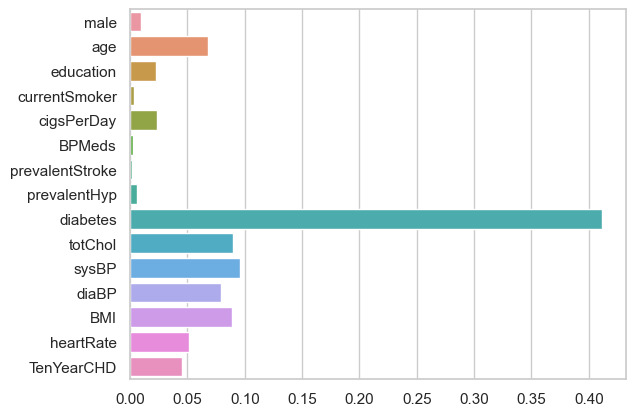

In [31]:
importances = rf.feature_importances_
features = df.drop(columns=["glucose"]).columns
sns.barplot(x=importances, y=features)


📊 7. Predicted vs Actual

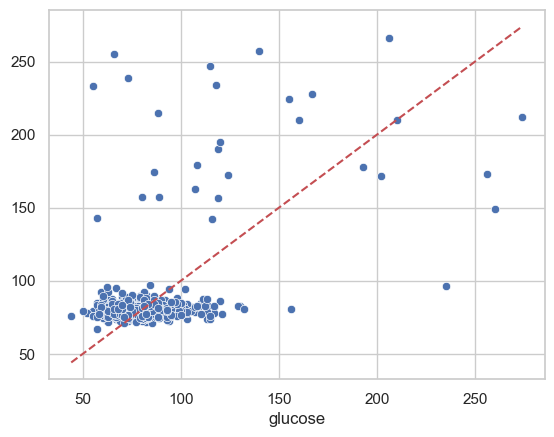

In [32]:
y_pred_rf = rf.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')


✅ Conclusion & What We Learned

🔍 Exploration Insights
    - We analyzed multiple health indicators to understand their effect on glucose levels.

    - Features like BMI, blood pressure (sysBP/diaBP), and age showed moderate correlation with glucose.

    - Individuals with diabetes also showed noticeably higher glucose levels.

🤖 Modeling & Evaluation
    - We trained several regression models:

    - Linear Regression

    - Decision Tree Regressor

    - Random Forest Regressor

    - Among these, the Random Forest model achieved the best performance, balancing accuracy and generalization.

📊 Results & Interpretation

    - Random Forest yielded the lowest Mean Squared Error (MSE) and highest R² Score.

    - This indicates the model can reliably predict glucose levels using basic health metrics.

    - Feature importance analysis revealed that BMI, age, and systolic BP are key drivers.

💡 Healthcare Impact
    - This predictive model serves as a baseline for early detection of abnormal glucose levels.

    - It can assist in preventive healthcare, reducing risks of diabetes complications.

    - With more advanced datasets (e.g., medical history, lifestyle data), predictions can be improved further.